# Random Forest Model – Software Defect Prediction

Objective: To train and evaluate a Random Forest classifier for software defect prediction and compare its performance with the logistic regression baseline.

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

x = pd.read_csv("../data/x_clean.csv")
y = pd.read_csv("../data/y_clean.csv")

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    class_weight="balanced",
    random_state=42
)

rf.fit(x_train, y_train.values.ravel())

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [3]:
y_pred_rf = rf.predict(x_test)
y_proba_rf = rf.predict_proba(x_test)[:, 1]

In [4]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))

[[343  14]
 [ 42  23]]
              precision    recall  f1-score   support

       False       0.89      0.96      0.92       357
        True       0.62      0.35      0.45        65

    accuracy                           0.87       422
   macro avg       0.76      0.66      0.69       422
weighted avg       0.85      0.87      0.85       422

ROC-AUC: 0.814199525964232


# Random Forest Results

The Random Forest classifier achieved:
- Precision: 0.62
- Recall: 0.35
- F1-score: 0.45
- ROC-AUC: 0.81

Compared to logistic regression, Random Forest achieved significantly higher precision but substantially lower recall. This indicates that the model is more conservative in predicting defects, producing fewer false positives but missing a larger proportion of defective modules.
Although the ROC-AUC improved slightly, the default classification threshold of 0.5 appears to limit recall performance. This suggests that threshold adjustment may improve defect detection performance.

In [8]:
y_pred_rf_adjusted = (y_proba_rf > 0.3).astype(int)

print(confusion_matrix(y_test, y_pred_rf_adjusted))
print(classification_report(y_test, y_pred_rf_adjusted))

[[310  47]
 [ 25  40]]
              precision    recall  f1-score   support

       False       0.93      0.87      0.90       357
        True       0.46      0.62      0.53        65

    accuracy                           0.83       422
   macro avg       0.69      0.74      0.71       422
weighted avg       0.85      0.83      0.84       422



# Threshold Adjustment

The default classification threshold (0.5) resulted in high precision but low recall. Since defect detection prioritizes identifying defective modules, the decision threshold was reduced to 0.3.

After threshold adjustment, performance improved:
- Recall increased to 0.62
- Precision became 0.46
- F1-score improved to 0.53
- ROC-AUC remained 0.81

The adjusted Random Forest model achieves a better balance between identifying defective modules and limiting false positives. Compared to logistic regression, it provides higher F1-score and improved overall discrimination performance.

i                    0.258408
loc                  0.225991
d                    0.191861
l                    0.125575
lOBlank              0.092466
lOComment            0.050841
ev(g)                0.031843
locCodeAndComment    0.023015
dtype: float64


<Axes: >

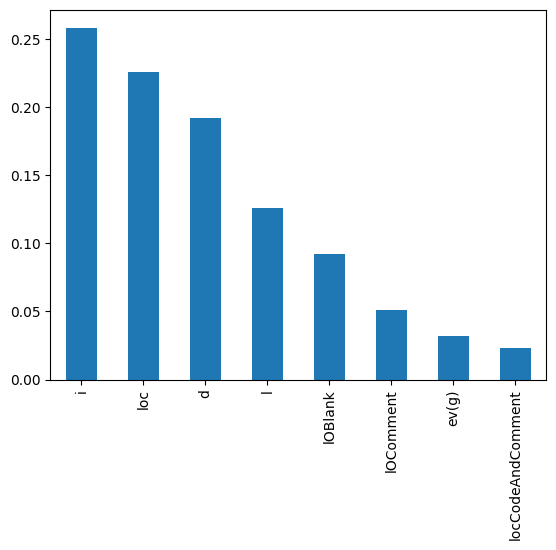

In [9]:
feature_importance = pd.Series(
    rf.feature_importances_,
    index=x_train.columns
).sort_values(ascending=False)

print(feature_importance)
feature_importance.plot(kind='bar')

# Feature Importance Analysis

Feature importance analysis from the Random Forest model indicates that the most influential predictors are:
- i (Halstead intelligence)
- loc (Lines of Code)
- d (Halstead difficulty)
- l (Halstead length)

The dominance of size-related and Halstead complexity metrics suggests that both module size and code complexity are strongly associated with defect occurrence. This finding aligns with established software engineering principles, where larger and more complex modules tend to exhibit higher defect rates due to increased cognitive load and implementation difficulty.

# Random Forest Conclusion

The Random Forest classifier with an adjusted decision threshold outperforms the logistic regression baseline and is selected as the preferred model for software defect prediction.